In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import scipy
import warnings
warnings.filterwarnings("ignore", category=np.ComplexWarning)

import sys
sys.path.append('../')
import RandomMatrix as RM


np.random.seed(140)

# Complex Eigenvalues

So far we have only seen processes with symmetric matrices, which means we have only worked with real eigenvalues. If instead all the entries of our matrix was generated by independent Brownian motions, we would expect many of our eigenvalues to be complex. According to *How many Eigenvalues of a Random Matrix are Real* by Alan Edelman, Eric Kostlan, Michael Shub if $E_n$ is the number of real eigenvalues for a $n \times n$ matrix where the entries are standard normal then 

$$\lim_{n \rightarrow \infty} \frac{E_n}{\sqrt{n}} = \sqrt{\frac{2}{\pi}}$$

Below we find the number of real eigenavlues in a $5000 \times 5000$ matrix with standard normal entries and compute the number of real eigenvalues over $\sqrt{5000}$.

In [2]:
N = 5000
A = np.random.normal(size=(N,N))
A_eigs = np.linalg.eigvals(A)
E_n = sum(np.isreal(A_eigs))
E_n/np.sqrt(N)

0.7919595949289332

This is fairly close to the asymptotic result.

In [3]:
np.sqrt(2/np.pi)

0.7978845608028654

$\sqrt{\frac{2}{\pi}}$ turns out to be a decent approximation for the expected number of real eigenvalues (scaled by $\frac{1}{\sqrt{n}}$) for smaller $n$. Below we randomly generate $10$ matrices of size $500 \times 500$. To see the movement of eigenvalues for matrix processes with complex eigenvalues, we will visualize them as dots on the complex plane.

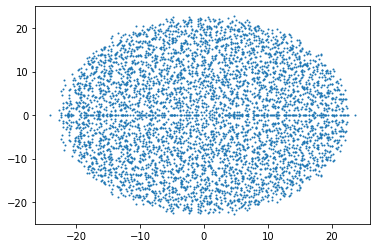

In [4]:
all_eigs = np.array([])
num_matrices = 10
n = 500
for _ in range(num_matrices):
    A = np.random.normal(size=(n,n))
    A_eigs = np.linalg.eigvals(A)
    all_eigs = np.append(all_eigs, A_eigs)
plt.scatter(np.real(all_eigs), np.imag(all_eigs), s=1);

In [5]:
sum(np.isreal(all_eigs))/(num_matrices * np.sqrt(n))

0.8497058314499201

# Simulating a Ginibre Process

If $A_t$ is the matrix state of the process at time $t$, and $0 \leq t_1 < t_2 < t_3$ then $(A_{t_2} - A_{t_1})_{ij} \sim N(0, t_2-t_1)$ and $A_{t_2} - A_{t_1}$ is independent of $A_{t_3} - A_{t_2}$. Again, we choose our initial state to be the zero matrix. We have chosen to demonstrate this example using 100x100 matrices. We begin by creating our displacement matrices. We will set the standard deviation of the entries for the displacement matrices to be $\sqrt{\frac{1}{10}}$, so if $D_1$ is the first displacement matrix then $A_{0} + D_1 = A_{1/10}$. 

In [6]:
n = 100
t_max = 100
init_matrix = np.zeros(shape=(n,n))
matrix_displacements = [np.random.normal(size=(n,n), scale=np.sqrt(1/10)) for time in range(t_max-1)]

We compute the process by taking the cumulative sum again and finding the eigenvalues.

In [7]:
process_data = [init_matrix]
process_data.extend(matrix_displacements)
Bmat_100_path = np.cumsum(process_data, axis=0)
Bmat_100_eigs = np.linalg.eigvals(Bmat_100_path)

We can animate the eigenvalues of the process in the Complex plane. The animation will play at 10 frames per second. Since each displacement matrix has entries with variance $\frac{1}{10}$, one second in the animation corresponds to one unit of time for the process. So the animation begins with $A_0$ and will show $A_t$ exactly $t$ seconds later.

In [8]:
fig, ax = plt.subplots()
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Process of Eigenvalues")
eig_plots = [ax.plot([],[], marker="o", c="black")[0] for i in range(n)]

def update(t):
    for i in range(n):
        eig_plots[i].set_data([np.real(Bmat_100_eigs[t][i])],[np.imag(Bmat_100_eigs[t][i])])
    return eig_plots

multiple_eigs_animation = animation.FuncAnimation(fig, update, interval=100, repeat=True, frames=t_max)

plt.close()
HTML(multiple_eigs_animation.to_html5_video())

# Initial Conditions

Suppose instead of $A_0$ being a zero matrix, we give it some new initial condition. Below we create a toeplitz matrix and visualize its eigenvalues.

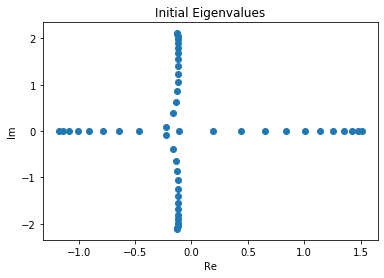

In [9]:
init_matrix = scipy.linalg.toeplitz(np.append([0,1], np.zeros(48)), np.append([0, -.5, .25, 1], np.zeros(46)))
init_eigs = np.linalg.eigvals(init_matrix)
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Initial Eigenvalues")
plt.scatter(np.real(init_eigs), np.imag(init_eigs));

If we play the animation slowly so that a unit of time of the process takes $10^5$ seconds, we can see the effect of the noise change the shape of the eigenvalues. Note that since we are playing the process very slowly, the eigenvalues won't move too quickly by the Bauer-Fike Theorem.

In [10]:
n = 50
t_max = 100
matrix_99_displacement = [np.random.normal(size=(n,n), scale=1e-3) for t in range(t_max-1)]
process_data = [init_matrix]
process_data.extend(matrix_99_displacement)
Bmat_100_path = np.cumsum(process_data, axis=0)
Bmat_100_eigs = np.linalg.eigvals(Bmat_100_path)
fig, ax = plt.subplots()
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Process of Eigenvalues")
eig_plots = [ax.plot([],[], marker="o", c="black")[0] for i in range(n)]

def update(t):
    for i in range(n):
        eig_plots[i].set_data([np.real(Bmat_100_eigs[t][i])],[np.imag(Bmat_100_eigs[t][i])])
    return eig_plots

multiple_eigs_animation = animation.FuncAnimation(fig, update, interval=100, repeat=True, frames=t_max)

plt.close()
HTML(multiple_eigs_animation.to_html5_video())

Now let's speed up the process so that it one second corresponds to one unit of time in the process.

In [11]:
n = 50
t_max = 100
init_matrix = scipy.linalg.toeplitz(np.append([0,1], np.zeros(48)), np.append([0, -.5, .25, 1], np.zeros(n-4)))
matrix_99_displacement = [np.random.normal(size=(n,n), scale=np.sqrt(1/10)) for t in range(t_max-1)]

process_data = [init_matrix]
process_data.extend(matrix_99_displacement)
Bmat_100_path = np.cumsum(process_data, axis=0)
Bmat_100_eigs = np.linalg.eigvals(Bmat_100_path)


fig, ax = plt.subplots()
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Process of Eigenvalues")
eig_plots = [ax.plot([],[], marker="o", c="black")[0] for i in range(n)]

def update(t):
    for i in range(n):
        eig_plots[i].set_data([np.real(Bmat_100_eigs[t][i])],[np.imag(Bmat_100_eigs[t][i])])
    return eig_plots

multiple_eigs_animation = animation.FuncAnimation(fig, update, interval=100, repeat=True, frames=t_max-1)

plt.close()
HTML(multiple_eigs_animation.to_html5_video())

As the process evolves, the effect of the different initial condition disappears.